In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Define the ranges for each feature 
age_range = (1, 35)
usage_range = (1, 34)
num_repairs = (1, 100)
maintenance_history = ['Good', 'Fair', 'Poor', 'Excellent']


In [3]:
# Define the function to generate a single row of data
def generate_elevator_data():
    elevator_id = f'E{str(random.randint(1, 9999)).zfill(4)}'
    age = random.randint(age_range[0], age_range[1])
    usage = random.randint(usage_range[0], usage_range[1])
    repairs = random.randint(num_repairs[0], num_repairs[1])
    maintenance = random.choice(maintenance_history)
    has_fault = 0 # initialize as no fault
    if age >= 10 and random.random() < 0.3:
        has_fault = 1
    return [elevator_id, age, usage, repairs, maintenance, has_fault]

# generate 50000 rows of data

data = []
for i in range(50000):
    row = generate_elevator_data()
    data.append(row)
    
# Create a Pandas DataFrame from the data and save it to CSV file

df = pd.DataFrame(data, columns=['Elevator_ID', 'Age (years)', 'Usage (hours/day)', 'Num_repairs', 'Maintenance History', 'Faulty'])
df.to_csv('elevator_data.csv', index=False)
    

# Exploratory Data Analysis 

In [4]:
df.head()

,Elevator_ID,Age (years),Usage (hours/day),Num_repairs,Maintenance History,Faulty
0,E5477,9,33,3,Excellent,0
1,E8952,32,33,64,Good,0
2,E0297,27,31,71,Good,0
3,E8454,34,19,15,Excellent,0
4,E3129,8,13,86,Excellent,0


In [5]:
df.shape

(50000, 6)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age (years),50000.0,17.99132,10.079724,1.0,9.0,18.0,27.0,35.0
Usage (hours/day),50000.0,17.55988,9.832273,1.0,9.0,18.0,26.0,34.0
Num_repairs,50000.0,50.55222,28.795327,1.0,26.0,51.0,75.0,100.0
Faulty,50000.0,0.22340,0.416528,0.0,0.0,0.0,0.0,1.0


Observations: 
   - We can see the maximum age recorded 35 years which is higher than the normal expectation of 20 - 35 years. It looks like data is incorrectly documented. 
   - The usage also got inaccurate number as amximum usage recorded 34 hours which is higher than a day's hours. 
    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Elevator_ID          50000 non-null  object
 1   Age (years)          50000 non-null  int64 
 2   Usage (hours/day)    50000 non-null  int64 
 3   Num_repairs          50000 non-null  int64 
 4   Maintenance History  50000 non-null  object
 5   Faulty               50000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.3+ MB


In [8]:
# exclude the rows for Age(years) greater than 25. 
mask1 = df['Age (years)'] > 25
df1 = df[~mask1]# filter the DataFrame to exclude rows where age(year) is greater than 25
print(df1.head(5))

  Elevator_ID  Age (years)  Usage (hours/day)  Num_repairs  \
0       E5477            9                 33            3   
4       E3129            8                 13           86   
5       E6395           25                 31           10   
6       E7609           17                 10           28   
8       E1248           19                 11           74   

  Maintenance History  Faulty  
0           Excellent       0  
4           Excellent       0  
5                Good       1  
6                Poor       0  
8                Fair       0  


In [9]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age (years),35762.0,13.025082,7.220114,1.0,7.0,13.0,19.0,25.0
Usage (hours/day),35762.0,17.577624,9.843573,1.0,9.0,18.0,26.0,34.0
Num_repairs,35762.0,50.659079,28.849186,1.0,26.0,51.0,76.0,100.0
Faulty,35762.0,0.193194,0.394809,0.0,0.0,0.0,0.0,1.0


In [10]:
# exclude the rows for Usage (hours/day) less than 25. 
df2 = df1.loc[df1['Usage (hours/day)'] <= 24]
print(df2.head())

   Elevator_ID  Age (years)  Usage (hours/day)  Num_repairs  \
4        E3129            8                 13           86   
6        E7609           17                 10           28   
8        E1248           19                 11           74   
9        E9239           23                  1           95   
10       E6188            2                 19            2   

   Maintenance History  Faulty  
4            Excellent       0  
6                 Poor       0  
8                 Fair       0  
9                 Fair       0  
10                Poor       0  


In [11]:
df2.shape

(25082, 6)

Observations:
    We can see there are almost 50% of the intial dataset data were incorrect. After removing it from the dataframe its now little over 25000. 

In [12]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age (years),25082.0,12.988199,7.216266,1.0,7.0,13.0,19.0,25.0
Usage (hours/day),25082.0,12.500000,6.945987,1.0,6.0,13.0,18.0,24.0
Num_repairs,25082.0,50.727813,28.861428,1.0,26.0,51.0,76.0,100.0
Faulty,25082.0,0.193127,0.394759,0.0,0.0,0.0,0.0,1.0


In [76]:
df3['Faulty'].value_counts()

0    20238
1     4844
Name: Faulty, dtype: int64

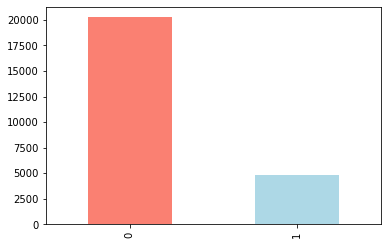

In [78]:
df3["Faulty"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

Creating a histogram to visualize the distribution the elevator ages

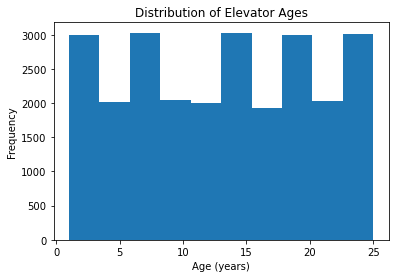

In [13]:
plt.hist(df2['Age (years)'], bins=10)
plt.title('Distribution of Elevator Ages')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

Observations:
- histogram shows data is normally distributed. 

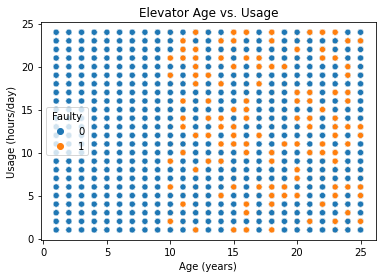

In [14]:
sns.scatterplot(data=df2, x='Age (years)', y='Usage (hours/day)', hue='Faulty')
plt.title('Elevator Age vs. Usage')
plt.show()

Observations:
- There is a weak positive correlation between elevator age and usage, and that faulty elevators tend to have higher usage and be older than non-faulty elevators.
- based on the EDA, we can conclude that elevator age and usage are important predictors of elevator faults, and that older elevators and those with higher usage are more likely to experience faults.


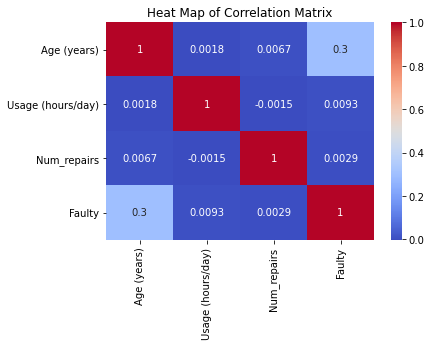

In [15]:
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')

# Add a title and axis labels
plt.title('Heat Map of Correlation Matrix')

# Show the plot
plt.show()

In [16]:
df3 = df2.drop(columns=['Elevator_ID', 'Maintenance History'])

C:\Users\saifa\anaconda3\conda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


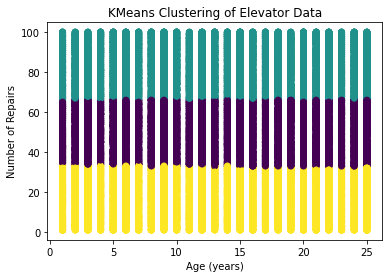

In [17]:
from sklearn.cluster import KMeans
# Initialize a KMeans object
kmeans = KMeans(n_clusters=3)

# Fit the KMeans model to the data
kmeans.fit(df2.drop(columns=['Elevator_ID', 'Maintenance History']))

# Get the cluster labels for each data point
labels = kmeans.labels_

# Create a scatter plot of the data with color-coded clusters
plt.title('Heat Map of Correlation Matrix')
plt.scatter(df2['Age (years)'], df2['Num_repairs'], c=labels)

# Add a title and axis labels
plt.title('KMeans Clustering of Elevator Data')
plt.xlabel('Age (years)')
plt.ylabel('Number of Repairs')

# Show the plot
plt.show()

In [18]:
# Importing necessary scikit learn library for fitting the model

In [19]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [36]:
# Splitting the data set into Training and Testing 

In [37]:
X = df3.drop('Faulty', axis=1)
y = df3['Faulty']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [42]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier(), 
          "Random Forest": RandomForestClassifier(),
          "SVM": SVC(),
          "Neural Network": MLPClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [44]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8092485549132948,
 'KNN': 0.7669922264301375,
 'Random Forest': 0.7548335658760216,
 'Decision Tree': 0.738489136934423,
 'SVM': 0.8092485549132948,
 'Neural Network': 0.8092485549132948}

Observations:
The highest accuracy scores are obtained by Logistic Regression, SVM, and Neural Network, all with a score of 0.809. This indicates that these models are likely to be the most effective for the given dataset.

The KNN model has an accuracy score of 0.767, which is somewhat lower than the top-performing models. This suggests that the KNN model may not be as well-suited for this particular dataset as other models.

The Random Forest and Decision Tree models have accuracy scores of 0.755 and 0.738, respectively, which are lower than the top-performing models but still reasonably high. Depending on the specific requirements and constraints of the task, it may still be worthwhile to consider these models.

It's important to note that accuracy is just one metric for evaluating model performance, and it may not always be the most appropriate metric for a given task. Other metrics, such as precision, recall, or F1 score, may be more relevant depending on the specifics of the task. It's a good idea to consider multiple metrics when evaluating models.

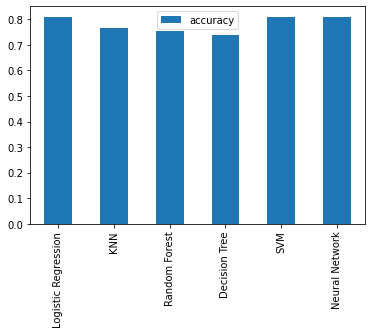

In [45]:
# Model Comparison 

model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

# Hyperparameter tuning (by hand)



In [46]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [47]:
train_scores


[0.9589833042611513,
 0.8629952653874906,
 0.8643408921006728,
 0.8358833790181909,
 0.8375778719162721,
 0.8261649638674309,
 0.828158484923997,
 0.8181410416147521,
 0.819087964116621,
 0.8141539995016197,
 0.8146523797657613,
 0.8111138798903563,
 0.811014203837528,
 0.8090705208073761,
 0.8105158235733865,
 0.8078744081734364,
 0.8089210067281336,
 0.807774732120608,
 0.8087714926488911,
 0.807774732120608]

In [48]:
test_scores

[0.7329081124177795,
 0.7851305561092287,
 0.7484552521427148,
 0.7899142914092087,
 0.7669922264301375,
 0.7913095475383696,
 0.7735698624676102,
 0.7937014151883596,
 0.7811441100259119,
 0.7974885389675105,
 0.7889176798883795,
 0.800478373529998,
 0.7948973490133546,
 0.8010763404424955,
 0.795694638230018,
 0.8000797289216663,
 0.7968905720550129,
 0.8020729519633247,
 0.800478373529998,
 0.8042654973091489]

Maximum KNN score on the test data: 80.43%


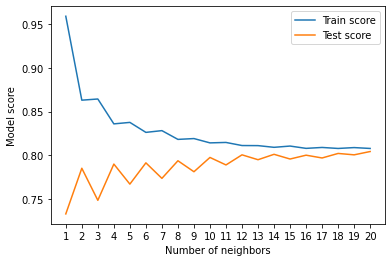

In [49]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

# Hyperparameter tuning with RandomizedSearchCV

In [51]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Observations:
    ow we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV..

In [53]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [54]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [55]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.03359818286283781}

In [56]:
rs_log_reg.score(X_test, y_test)

0.8092485549132948

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [ ]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

In [ ]:
# Find the best hyperparameters
rs_rf.best_params_

In [ ]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

# Hyperparamter Tuning with GridSearchCV

In [ ]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

In [ ]:
# Check the best hyperparmaters
gs_log_reg.best_params_
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

# Evaluting our tuned machine learning classifier, beyond accuracy

In [ ]:
 Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

In [ ]:
y_test

In [ ]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [ ]:
print(classification_report(y_test, y_preds))

# Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [64]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.01610262027560939, 'solver': 'liblinear'}

In [67]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [69]:

from sklearn.model_selection import cross_val_score
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.80685669, 0.80685669, 0.80701754, 0.80681818, 0.80681818])

In [70]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8068734564045243

In [71]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

C:\Users\saifa\anaconda3\conda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saifa\anaconda3\conda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saifa\anaconda3\conda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saifa\anaconda3\conda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedM

0.0

In [72]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.0

In [73]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.0

In [83]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


In [84]:
# Apply random oversampling to balance the dataset
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# Apply random oversampling to balance the dataset
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# Train logistic regression on the resampled data
lr = LogisticRegression(random_state=42)
lr.fit(X_train_res, y_train_res)

# Train SVM on the resampled data
svc = SVC(random_state=42)
svc.fit(X_train_res, y_train_res)

# Train neural network on the resampled data
nn = MLPClassifier(random_state=42)
nn.fit(X_train_res, y_train_res)

# Make predictions on the test set
lr_pred = lr.predict(X_test)
svc_pred = svc.predict(X_test)
nn_pred = nn.predict(X_test)

# Print the classification report for each model
print("Logistic Regression:\n", classification_report(y_test, lr_pred))
print("SVM:\n", classification_report(y_test, svc_pred))
print("Neural Network:\n", classification_report(y_test, nn_pred))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.89      0.62      0.73      4060
           1       0.29      0.67      0.41       957

    accuracy                           0.63      5017
   macro avg       0.59      0.65      0.57      5017
weighted avg       0.78      0.63      0.67      5017

SVM:
               precision    recall  f1-score   support

           0       0.96      0.49      0.65      4060
           1       0.29      0.91      0.44       957

    accuracy                           0.57      5017
   macro avg       0.63      0.70      0.55      5017
weighted avg       0.83      0.57      0.61      5017

Neural Network:
               precision    recall  f1-score   support

           0       0.98      0.46      0.63      4060
           1       0.30      0.97      0.45       957

    accuracy                           0.56      5017
   macro avg       0.64      0.71      0.54      5017
weighted avg       0.85      

Observations:
    Based on the precision, recall and f1-score metrics, the Logistic Regression model seems to perform the best out of the three models for this particular problem. It has the highest overall weighted f1-score of 0.67, while the SVM and Neural Network models have weighted f1-scores of 0.61 and 0.59, respectively.